In [1]:
!pip install keras

In [2]:
!pip install tensorflow

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Alphabets_data.csv')
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [4]:
df.isnull().sum()

,0
letter,0
xbox,0
ybox,0
width,0
height,0
onpix,0
xbar,0
ybar,0
x2bar,0
y2bar,0


In [5]:
df.duplicated().sum()

1332

In [6]:
df.drop_duplicates(inplace=True)
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000
mean,4.150793,7.244322,5.279891,5.506910,3.660596,6.919381,7.529409,4.584637,5.201361,8.353171,6.452700,7.924577,3.131455,8.351832,3.796872,7.784390
std,1.879428,3.187660,1.934960,2.178292,2.160555,2.032226,2.319834,2.625714,2.320102,2.468905,2.624673,2.106957,2.323901,1.574853,2.540271,1.657358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,2.000000,8.000000,2.000000,7.000000
50%,4.000000,8.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,4.000000,8.000000
75%,5.000000,10.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,9.000000
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000


<Axes: xlabel='count', ylabel='letter'>

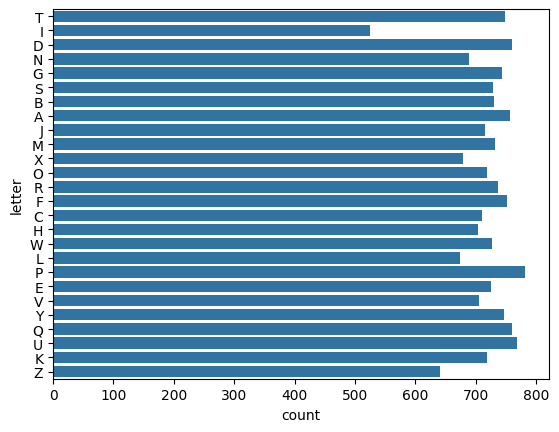

In [7]:
sns.countplot(df["letter"])

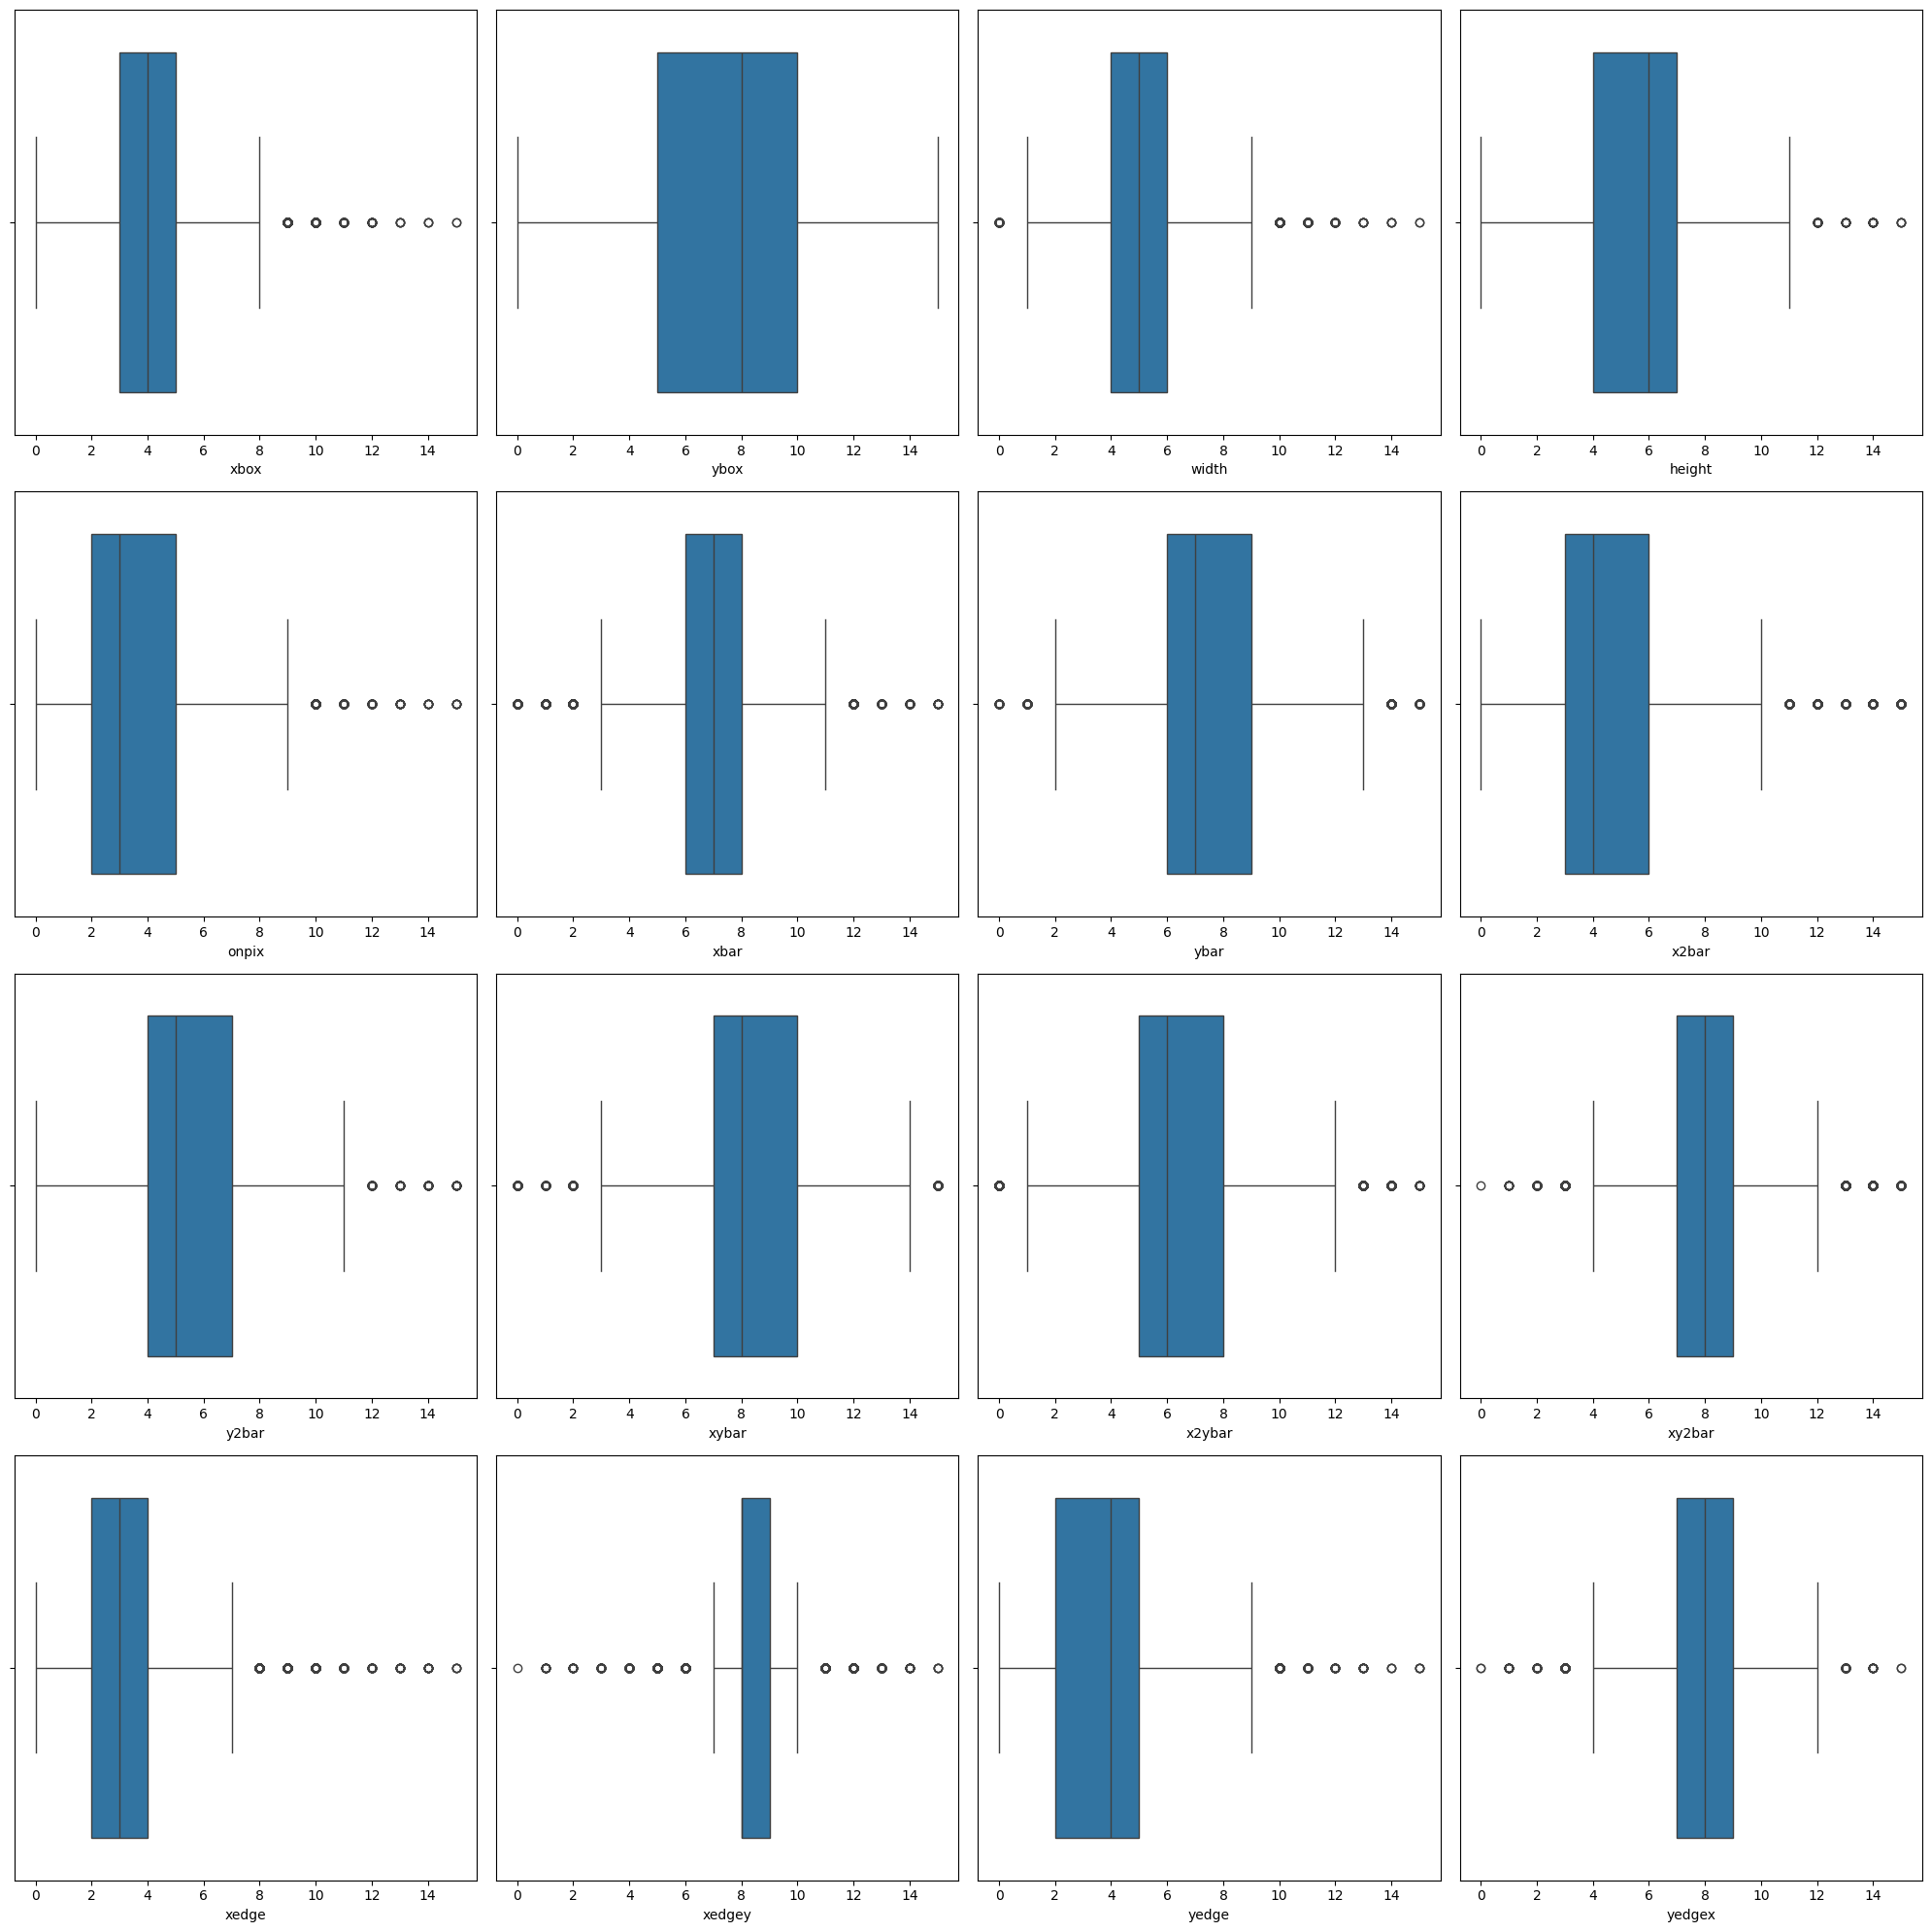

In [8]:
cols = df.columns[1:].tolist()  # Exclude the last column
fig, ax = plt.subplots(4, 4, figsize=(20, 20))  # 4 rows, 4 columns for the subplots
r = c = 0
for col in cols:
    sns.boxplot(x=col, data=df, ax=ax[r, c])
    c += 1
    if c == 4:
        r += 1
        c = 0
plt.tight_layout()
plt.show()

In [9]:
sns.pairplot(df,hue='letter')

Output hidden; open in https://colab.research.google.com to view.

In [10]:
X = df.drop('letter',axis=1).values
# Since this ia a multiclass-classification, output labels are one-hot encoded for training the ANN
y = pd.get_dummies(df['letter']).values

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.25,random_state=101)

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
import tensorflow
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [22]:
pip install tensorflow


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [26]:
!pip install scikeras # Install the scikeras package to integrate keras with scikit-learn

from scikeras.wrappers import KerasClassifier # Import KerasClassifier from scikeras

In [17]:
X_train_scaled.shape[1:]

(16,)

In [18]:
def build_model(n_hidden = 1, n_neurons=5, learning_rate=3e-3, input_shape=X_train_scaled.shape[1:]):
  '''
  Builds a keras ANN for Multi-Class Classification i.e. output classes which are mutually exclusive
  '''
  model = Sequential()
  options = {"input_shape": input_shape}
  # Adding input and hidden layers
  for layer in range(n_hidden):
    model.add(Dense(n_neurons,activation="relu",**options))
    options = {}
  # Adding output layer having 3 neurons, 1 per class
  model.add(Dense(3,activation='softmax'))
  # Creating instance of adam optimizer
  opt = Adam(learning_rate=learning_rate)
  model.compile(optimizer=opt,loss='categorical_crossentropy',metrics='accuracy')
  return model

In [27]:
# Applying KerasClassifier Wrapper to neural network
keras_cls = KerasClassifier(build_model)

In [44]:
# Hyperparameter tuning

from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import RandomizedSearchCV

param_dict = {
    "n_hidden" : (2,3),
    "n_neurons" : tuple(range(2,7)),
    "learning_rate" : (3e-2,3e-3,3e-4)
}

model_cv = RandomizedSearchCV(keras_cls, param_dict, n_iter=10, cv=3)

In [48]:
def build_model(n_hidden = 1, n_neurons=5, learning_rate=3e-3, input_shape=X_train_scaled.shape[1:]):
  '''
  Builds a keras ANN for Multi-Class Classification i.e. output classes which are mutually exclusive
  '''
  model = Sequential()
  options = {"input_shape": input_shape}
  # Adding input and hidden layers
  for layer in range(n_hidden):
    model.add(Dense(n_neurons,activation="relu",**options))
    options = {}
  # Adding output layer having 3 neurons, 1 per class
  model.add(Dense(3,activation='softmax'))
  # Creating instance of adam optimizer
  opt = Adam(learning_rate=learning_rate)
  # Changed 'accuracy' to ['accuracy'] to provide metrics as a list
  model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [53]:
def build_model(n_hidden = 1, n_neurons=5, learning_rate=3e-3, input_shape=X_train_scaled.shape[1:], n_outputs=y_train_encoded.shape[1]): # Pass n_outputs as an argument
  '''
  Builds a keras ANN for Multi-Class Classification i.e. output classes which are mutually exclusive
  '''
  model = Sequential()
  options = {"input_shape": input_shape}
  # Adding input and hidden layers
  for layer in range(n_hidden):
    model.add(Dense(n_neurons,activation="relu",**options))
    options = {}
  # Adding output layer with n_outputs neurons
  model.add(Dense(n_outputs,activation='softmax')) # Use n_outputs for the output layer
  # Creating instance of adam optimizer
  opt = Adam(learning_rate=learning_rate)
  # Changed 'accuracy' to ['accuracy'] to provide metrics as a list
  model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
  return model

# Applying KerasClassifier Wrapper to neural network
keras_cls = KerasClassifier(build_model)

# Hyperparameter tuning
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelBinarizer # Import for one-hot encoding

param_dict = {
    'model__n_hidden' : (2,3),
    'model__n_neurons' : tuple(range(2,7)),
    'model__learning_rate' : (3e-2,3e-3,3e-4)
}

model_cv = RandomizedSearchCV(keras_cls, param_dict, n_iter=10, cv=3)

# Assuming you have X_train_scaled and y_train as your training data
# and y_train needs to be one-hot encoded

# Create an instance of LabelBinarizer
encoder = LabelBinarizer()

# Fit the encoder to your training target variable (y_train)
# Assuming y_train exists in your environment
encoder.fit(y_train) # Replace y_train with your actual target variable name if different

# Transform your training target variable to one-hot encoded format
y_train_encoded = encoder.transform(y_train)

# Fit the model to your data
model_cv.fit(X_train_scaled, y_train_encoded) # This line was causing the error

# Now you can access best_params_
model_cv.best_params_


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0335 - loss: 3.2580
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0410 - loss: 3.2580
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0364 - loss: 3.2573
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0664 - loss: 3.1830
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0565 - loss: 3.2247
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0396 - loss: 3.2543
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0530 - loss: 3.2292
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0396 - loss: 3.2610
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0389 - loss: 3.2511
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0349 - loss: 3.2758
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0326 - loss: 3.2562
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0423 - loss: 3.2911
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0664 - loss: 3.2077
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0456 - loss: 3.2537
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0616 - loss: 3.1762
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0452 - loss: 3.2560
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0502 - loss: 3.2566
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0543 - loss: 3.2776
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0410 - loss: 3.2569
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0375 - loss: 3.2531
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0497 - loss: 3.2421
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0431 - loss: 3.2525
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0595 - loss: 3.1938
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0541 - loss: 3.2322
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0424 - loss: 3.2581
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0611 - loss: 3.2523
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0398 - loss: 3.2570
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0358 - loss: 3.2577
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0463 - loss: 3.2215
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0577 - loss: 3.1776
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0659 - loss: 3.1607


{'model__n_neurons': 6, 'model__n_hidden': 2, 'model__learning_rate': 0.003}

In [54]:
model_cv.best_score_

0.12691950574958932

In [56]:
best_set = model_cv.best_params_

# Access parameters using the correct keys with 'model__' prefix
model = build_model(learning_rate= best_set['model__learning_rate'],
                    n_hidden= best_set['model__n_hidden'],
                    n_neurons= best_set['model__n_neurons'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model.fit(
    X_train_scaled, y_train, epochs=100,
    validation_data = (X_test_scaled,y_test),
    callbacks = [EarlyStopping(monitor='val_loss', mode='min', patience=10)],
    verbose=0
)

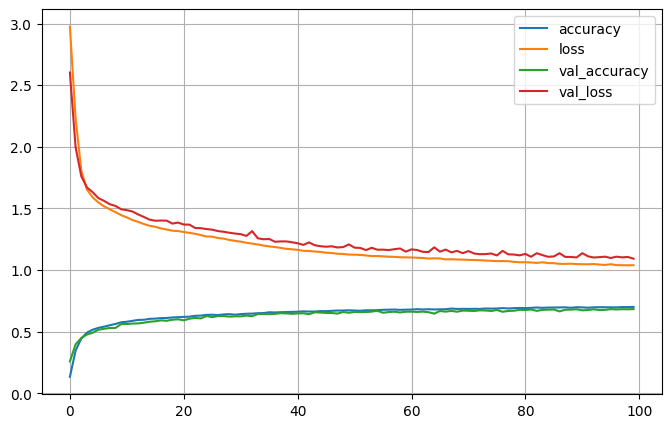

In [58]:
pd.DataFrame(model.history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [60]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

# Predict probabilities using the 'predict' method
pred_probs = model.predict(X_test_scaled)

# Get predicted class labels using argmax
pred_classes = np.argmax(pred_probs, axis=1)
y_test_classes = np.argmax(y_test,axis=1)
print(classification_report(y_test_classes,pred_classes),"\n\n")
print(confusion_matrix(y_test_classes,pred_classes))

146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       180
           1       0.53      0.88      0.66       170
           2       0.79      0.70      0.74       184
           3       0.72      0.67      0.69       168
           4       0.64      0.59      0.62       180
           5       0.76      0.62      0.69       186
           6       0.48      0.53      0.51       170
           7       0.53      0.43      0.48       199
           8       0.82      0.51      0.63       136
           9       0.80      0.80      0.80       172
          10       0.63      0.56      0.59       195
          11       0.81      0.74      0.77       171
          12       0.82      0.92      0.87       156
          13       0.86      0.63      0.73       164
          14       0.68      0.73      0.70       211
          15       0.74      0.86      0.80       206
          16       0.50      0.56      0